[2.4957823699994353, 0.16344409559147288, 0.007574815405216545, 0.0003375246750708247, 1.5574908451424807e-05, 7.633765955648211e-07, 4.033893181593717e-08, 2.30000092116511e-09, 1.394988160124136e-10, 8.823924724802698e-12]


/Users/vladimirmakaric/anaconda3/envs/ai/lib/python3.11/site-packages/pyamg/classical/classical.py:97: SparseEfficiencyWarning: Implicit conversion of A to CSR
  warn('Implicit conversion of A to CSR',


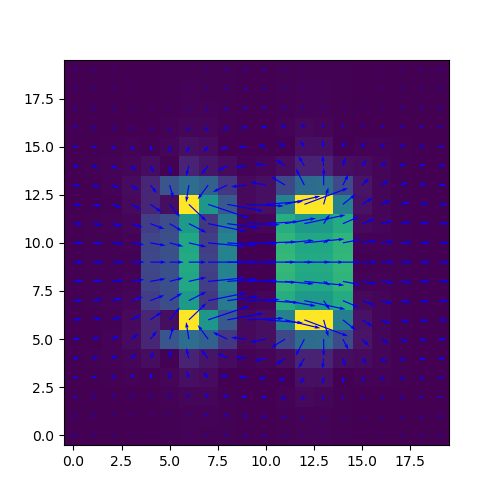

In [2]:
# Divergence is not equal zero after the projection step.
%matplotlib widget
import matplotlib.pyplot as plt
import importlib
import navier_stokes
importlib.reload(navier_stokes)
import numpy as np

height = 20
width = 20
grid = np.zeros(shape=(height,width))

simulator = navier_stokes.Simulator(grid)
cells = simulator.cells
s,e =int(cells.shape[0] / 3), int(cells.shape[0] * (2 / 3))

# Problem persists even if the force field gradually tapers off.
# simulator.force_field[s-4 : e+4, s-4:e+4] = [0.2, 0]
# simulator.force_field[s-3 : e+3, s-3:e+3] = [0.4, 0]
# simulator.force_field[s-2 : e+2, s-2:e+2] = [0.6, 0]
# simulator.force_field[s-1 : e+1, s-1:e+1] = [0.8, 0]
simulator.force_field[s:e,s:e] = [1, 0]
vf = simulator.step(dt=1)
divfield = np.zeros(cells.shape)
for fc in simulator.cells.flat:
    xdiff = (vf[fc.right.index][0] - vf[fc.left.index][0]) / 2
    ydiff = (vf[fc.up.index][1] - vf[fc.down.index][1]) / 2
    divergence = xdiff + ydiff
    divfield[fc.index] = np.abs(divergence)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, vf[:, :, 0], vf[:, :, 1], color="b")
plt.imshow(divfield, interpolation='none', origin='lower')
plt.show()